# Abstract


Beim Messen und Erfassen von Datensätzen lassen sich oft Zusammenhänge zwischen den unterschiedlichen Daten erkennen. Diese Zusammenhänge können sich in den Unterschiedlichsten Formen bemerkbar machen. Aufgrund der der imperfektion von Messverfahren und der allgemeinen ungenauifkeit der echten Welt sind Messreihen oft auch nicht Fehlerfrei. Die in diesem Paper beschriebenen Verfahren für die Regression und Interpolation von Daten sollen bei der Auswertung und Analyse von Daten helfen. Inbesondere werden die Verfahren der linearen und polynomialen Regression, die Betrachtung der Korrelation von Daten und die kubische Interpolation betrachtet.

# Einleitung

# Theorie

## Korrelation von Daten

Die Korrelation eines Datensatzes beschreibt ob es eine lineare Abhängigkeit zwischen den Daten gibt. Dieser Faktor ermöglicht es die Hypothese $$y \underset{\sim}{\propto} x$$ schnell zu Überprüfen. Hierzu wird der Korrelationsfaktor (oder auch Produkt-Moment-Korrelation gennant) verwendet. Dieser Faktor bestimmt einen einheitslosen Wert im Intervall 
$[-1; 1]$
mithilfe dessen Aussagen über die Korrelation des Datensatzes getroffen werden. Ein Wert von 1 bedeutet in diesem Fall eine komplette lienare korrelation zwischen den Daten, also $y \propto x$. Ein Wert von -1 hingegen bedeutet eine gegenteilige lineare korrelation, es gilt also $y -\propto x$. Ein Wert von, oder nah an 0 hingegen spricht dafür, dass es sich in diesem Fall um Daten handelt welche nicht linear korreliert sind.
Zur Berechnung des Korrelationsfaktors wird die Gleichung

$$r=\frac{\sum_{k=1}^n(x_k-\overline x)(y_k-\overline y)}{\sqrt {\sum_{k=1}^n(x_k-\overline x)^2 \sum_{k=1}^n(y_k-\overline y)^2}} $$

verwendet, wobei $r$ der zu berechnende Korrelationsfaktor und $\overline x$ beziehungsweise $\overline y$ dar jeweilige arithmetische Mittelwert der Daten ist. Um diese Funktionalität nun in Python abzubilden, stellen wir zuerst Funktionen für die Kalkulation des Mittelwertes eines Arrays auf. Hierzu bilden wir die Funktion 
$$\overline x = \frac{\sum_{k=1}^n(x_k)}{|x|}$$
in Python ab

<font color='red'>Ist das der richtige Weg die Länge einer Liste auszudrücken?</font>


In [23]:
def mean(data):
    sum = 0
    for x in data:
        sum += x
    return sum / len(data)

Anstatt dieser Funktion kann auch die Numpy-interne Funktoin `numpy.mean` verwendet werden. Nun kann die Funktion zur Bestimmung des Korrelationsfaktors wie folgt implementiert werden.

In [24]:
from math import sqrt

def correlation(x_data, y_data):
    # Ensure both data-arrays are the same length
    assert len(x_data) == len(y_data)
    
    # Setup runtime variables needed for iteration
    data_len = len(x_data)
    mean_x = mean(x_data)
    mean_y = mean(y_data)
    
    # Calculate the upper sum part of the fraction
    
    upper_sum = 0
    for k in range(0, data_len):
        upper_sum += (x_data[k] - mean_x) * (y_data[k] - mean_y)
    
    # Calculate the lower sum part of the fraction
    lower_sum_left = 0
    lower_sum_right = 0
    for k in range(0, data_len):
        lower_sum_left += pow((x_data[k] - mean_x), 2)
        lower_sum_right += pow((y_data[k] - mean_x), 2)        
    
    # Calculate the resulting correlation-factor
    return upper_sum / sqrt((lower_sum_left * lower_sum_right))

Mithilfe dieser Funktion können wir nun von einem belibiegem Datensatz den Korrelationsfaktor bestimmen.

## Lineare Regression

Bei der linearen Regression handelt es sich um eine Methode zur Interpolation von Daten welche in einem linearen Zusammenhang stehen. Das Prinzip besteht daraus, mithilfe einer linearen Gleichung abzubilden. Hierbei soll die entstehende Gleichung der allgemeinen Formel für lineare Gleichungen, also 
$$f(x) = m * x +b$$ 
folgen. Diese Art der Regression bietet sich an, wenn eine hohe lineare Korrelation zwischen den Daten haben. 

# Verwendete Pakete importieren

In [25]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import interpolate as ip

# Einstellungen

In [26]:
use_darkmode = True
if use_darkmode:
    plt.style.use('dark_background')
    
np.random.seed(498451668)

# Testdatensätze erzeugen
Um diese Verfahren, und den geschriebenen Code zu testen benötigen wir Testdaten. Hierzu gibt es mehrere Wege Datensätze zu generieren welche wir verwenden können. Als erstes erstellen wir zwei Datensätze für welche uns der Zusammenhang der Daten bereits klar ist. Nachdem wir mit diesem unsere Implementationen auf Fehler überprüft haben, verwenden wir realistischere Datensätze. 

## Linearer Testdatensatz
Um einen linearen Datensatz zu erzeugen welchen wir für unsere Tests verwenden können bilden wir eine lineare Gleichung ab. Hierzu verwenden wir exemplarisch die Funtion $f(x) = 0.75 * x + 1.1$ . Diese Funktion bilden wir für das Intervall $[-10; 10]$ mit einer Schrittweite von $0.1$ ab. Um diesen Datensatz nun an die realität anzunähern verschieben wir die resultierenden were für $y$ nun um einen zufälligen Wert im Intervall $[-0.5; 0.5]$. Diese pseude-zufälligen Werte werden mithilfe von Numpy generiert und folgen einer Normalverteilung.

In [36]:
x_data = np.linspace(-10, 10, 200)

def f_lin(x):
    res = 0.75 * x + 1.1
    res += np.random.normal(0, 1, x.shape)
    return res

y_data_lin = f_lin(x_data)

Wenn wir diese Werte nun nach ihrer linearen Abhängigkeit untersuchen wollen können wir zuerst den Korrelationsfaktor der Daten bestimmen.

In [37]:
correlation(x_data, y_data_lin)

0.9418100914034944

Da der resultierende Wert nah an $1$ ist, können wir nun davon ausgehen, dass die Werte stark linear korreliert sind. Um nun eine Funktion zu bestimmen, welche diese Werte möglichst akkurat bestimmt, können wir die lineare Regression auf diesen Datensatz anweden.

<font color='red'>ToDo Hier linreg verwenden</font>

## Nicht-linearer Testdatensatz

In [28]:
def f_sqrd(x):
    res = 0.75 * x**2 + 1.1
    res += np.random.normal(0, 1, x.shape)
    return res

y_data_sqrd = f_sqrd(x_data)

# Funktion um Testdaten in einem Scatterplot anzuzeigen

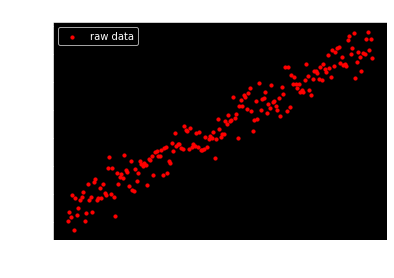

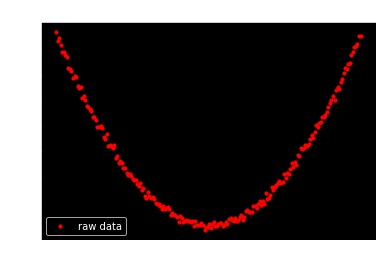

In [29]:
def scatter_plot(x_data, y_data):
    plt.title("Scatterplot")
    plt.xlabel("x axis data")
    plt.ylabel("y axis data")
    plt.scatter(x_data, y_data, c='red', s=10, label="raw data")
    plt.legend()
    plt.show()

scatter_plot(x_data, y_data_lin)
scatter_plot(x_data, y_data_sqrd)

# Funktion zur linearen Inerpolation des Testdatensatzes

In [30]:
def linreg_plot(x_data, y_data):
    model = np.polyfit(x_data, y_data, 1)

    def linregf(x):
        return model[0]*x + model[1]

    linreg_data = linregf(x_data)
    plt.scatter(x_data, y_data, c='red', s=10, label="raw data")
    plt.plot(x_data, linreg_data, c = 'b', label="Linear regression Line")
    plt.legend()
    plt.show()

# Polyfit funktion mit variablem Polynomengrad

In [31]:
def polyfit_plot(x_data, y_data, degree):
    model = np.polyfit(x_data, y_data, degree)
    
    def poly_reg(x):
        result = 0
        for i in range(0, degree):
            result += model[i]*x**(degree - i)
        return result

    linreg_data = poly_reg(x_data)
    plt.scatter(x_data, y_data, c='red', s=10, label="raw data")
    plt.plot(x_data, linreg_data, c = 'b', label="polynomial regression Line")
    plt.legend()
    plt.show()

# Funktion für Cubic-Spline Interpolation

In [32]:
def cubic_spline_plot(x_data, y_data):
    model = ip.CubicSpline(x_data, y_data)
    
    plt.scatter(x_data, y_data, c='red', s=10, label="raw data")
    plt.plot(x_data, 
             model(x_data, 0), # 0 -> f(x), 1 -> f'(x), 2 -> f''(x)
             c = 'b', 
             label="cubic spline interpolation Line")
    plt.legend()
    plt.show()

# Interpolation einer Sinus-Funktion

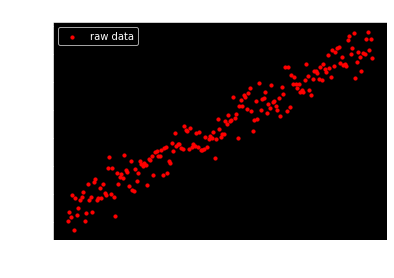

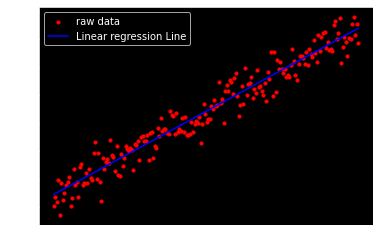

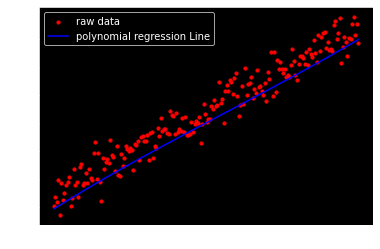

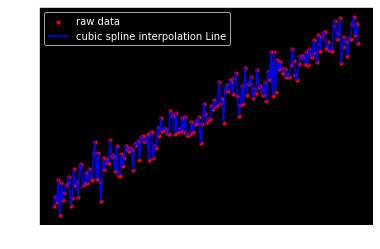

In [33]:
scatter_plot(x_data, y_data_lin)
linreg_plot(x_data, y_data_lin)
polyfit_plot(x_data, y_data_lin, 3)
cubic_spline_plot(x_data, y_data_lin)

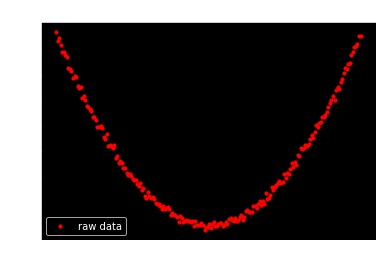

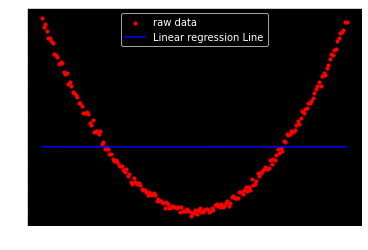

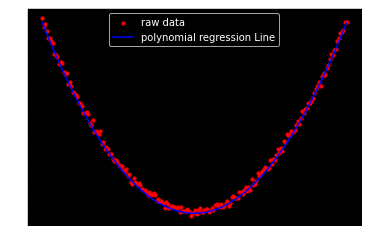

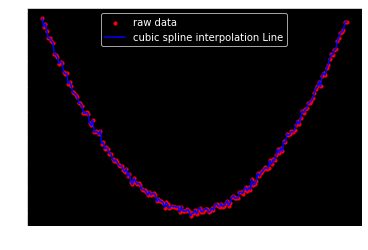

In [34]:
scatter_plot(x_data, y_data_sqrd)
linreg_plot(x_data, y_data_sqrd)
polyfit_plot(x_data, y_data_sqrd, 3)
cubic_spline_plot(x_data, y_data_sqrd)